# Cadeia de Markov

Cadeia de Markov no aprendizado por reforço é uma maneira de modelar o ambiente no qual um agente toma decisões sequenciais, levando em consideração a incerteza nas transições entre estados. Essa modelagem ajuda o agente a tomar decisões que maximizem sua recompensa ao longo do tempo.

# Importando as bibliotecas

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


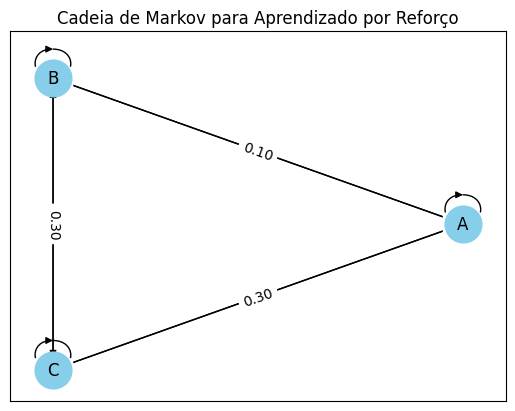

Estado Inicial: A
Transição: A -> C (Probabilidade: 0.10)
Transição: C -> C (Probabilidade: 0.40)
Transição: C -> A (Probabilidade: 0.30)
Transição: A -> A (Probabilidade: 0.70)
Transição: A -> C (Probabilidade: 0.10)
Transição: C -> A (Probabilidade: 0.30)
Transição: A -> A (Probabilidade: 0.70)
Transição: A -> A (Probabilidade: 0.70)
Transição: A -> A (Probabilidade: 0.70)
Transição: A -> C (Probabilidade: 0.10)
Transição: C -> A (Probabilidade: 0.30)
Transição: A -> A (Probabilidade: 0.70)
Transição: A -> B (Probabilidade: 0.20)
Transição: B -> A (Probabilidade: 0.10)
Transição: A -> B (Probabilidade: 0.20)
Transição: B -> B (Probabilidade: 0.60)
Transição: B -> B (Probabilidade: 0.60)
Transição: B -> B (Probabilidade: 0.60)
Transição: B -> C (Probabilidade: 0.30)
Transição: C -> C (Probabilidade: 0.40)


In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Criando a cadeia de Markov
G = nx.DiGraph()

# Adicionando estados
states = ['A', 'B', 'C']
G.add_nodes_from(states)

# Adicionando transições (arestas) com probabilidades
transitions = [('A', 'A', 0.7), ('A', 'B', 0.2), ('A', 'C', 0.1),
               ('B', 'A', 0.1), ('B', 'B', 0.6), ('B', 'C', 0.3),
               ('C', 'A', 0.3), ('C', 'B', 0.3), ('C', 'C', 0.4)]

for transition in transitions:
    G.add_edge(transition[0], transition[1], weight=transition[2])

# Visualizando a cadeia de Markov
pos = nx.circular_layout(G)
labels = {state: state for state in states}
edge_labels = {(transition[0], transition[1]): f"{transition[2]:.2f}" for transition in transitions}

nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, labels=labels)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Cadeia de Markov para Aprendizado por Reforço')
plt.show()

# Simulação do agente percorrendo a cadeia de Markov
current_state = np.random.choice(states)
print(f"Estado Inicial: {current_state}")

# Simulando 10 transições
for _ in range(20):
    next_state = np.random.choice(list(G.successors(current_state)), p=[G[current_state][successor]['weight'] for successor in G.successors(current_state)])
    probability = G[current_state][next_state]['weight']
    print(f"Transição: {current_state} -> {next_state} (Probabilidade: {probability:.2f})")
    current_state = next_state
